Deteksi Penyakit Pada Daun Mangga Menggunakan CNN

Import Library

In [7]:
import tensorflow as tf #Membangun model deep learning (CNN)dgn Keras dan TensorFlow
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Untuk augmentasi dan pembacaan gambar dari folder
from tensorflow.keras.models import Sequential # untuk model berurutan(layer disusun linear)
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout #blok dasar dari CNN untuk klasifikasi gambar

Memanggil dataset

In [8]:
from google.colab import drive # fungsi bawaaan colab untuk akses G.drive
drive.mount('/content/drive') # minta izin untuk akses akun drive

dataset_dir = '/content/drive/MyDrive/Semester 8/Computer Vision/MangoLeafBD Dataset' #menuju dataset daun mangga yang ada di drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Menentukan ukuran gambar dan batchnya

In [9]:
img_height, img_width = 150, 150 # Menentukan ukuran gambar yang akan dimasukkan ke model.
batch_size = 32

 Image Augmentation & Preprocessing

In [10]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # 20% validasi     # 80% data untuk training, 20% untuk validasi
    rotation_range=20,
    zoom_range=0.15,         # Membantu model generalisasi lebih baik dengan variasi diputar diperbesar dan diperkecil
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = digunakan untuk melatih model (fit)

validation_generator = digunakan untuk mengevaluasi model saat pelatihan

In [11]:
train_generator = train_datagen.flow_from_directory( #Membaca gambar langsung dari struktur folder
    dataset_dir,
    target_size=(img_height, img_width), # Semua gambar 150X150 pixel
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)
validation_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 1600 images belonging to 4 classes.
Found 400 images belonging to 4 classes.


Membangun Model CNN

In [12]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_height, img_width, 3)),# Menangkap fitur dasar seperti tepi dan warna.
    MaxPooling2D(2,2), # Mengurangi ukuran data sambil mempertahankan fitur penting.

    Conv2D(64, (3,3), activation='relu'),# Menangkap fitur lebih kompleks seperti bentuk atau pola bercak daun.
    MaxPooling2D(2,2),# Menangkap fitur lebih kompleks seperti bentuk atau pola bercak daun.

    Conv2D(128, (3,3), activation='relu'), # Layer ketiga dengan 128 filter.
    MaxPooling2D(2,2), # Layer ketiga dengan 128 filter.

    Flatten(),# mengubah dari 3D menjadi 1D
    Dense(128, activation='relu'),# menggabungkan fitur-fitur dan membuat prediksi.
    Dropout(0.5),
    Dense(4, activation='softmax')  # Output layer untuk 4 kelas
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Kompilasi Model

In [13]:
model.compile( # mengkonfigurasi model sebelum dilatih
    optimizer='adam',
    loss='categorical_crossentropy',  # untuk multiclass
    metrics=['accuracy']
)

Menampilkan Ringkasan Model

Membantu mengetahui apakah model terlalu kompleks atau terlalu kecil.

In [14]:
model.summary() #menampilkan ringkasan arsitektur model

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,868 (18.42 MB)

 Trainable params: 4,828,868 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

Training Model

In [15]:
epochs = 10 # menggunakan 10 epoch
history = model.fit( # menyimpan hasil training, termasuk loss dan accuracy per epoch.
    train_generator,
    validation_data=validation_generator,
    epochs=epochs
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 380s 8s/step - accuracy: 0.2666 - loss: 1.4228 - val_accuracy: 0.4000 - val_loss: 1.2138
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.4586 - loss: 1.0706 - val_accuracy: 0.4175 - val_loss: 1.0597
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 0.5652 - loss: 0.9011 - val_accuracy: 0.5100 - val_loss: 1.0364
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 0.6412 - loss: 0.8085 - val_accuracy: 0.6100 - val_loss: 1.0447
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.7239 - loss: 0.6581 - val_accuracy: 0.6650 - val_loss: 0.8413
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 148s 2s/step - accuracy: 0.7853 - loss: 0.5001 - val_accuracy: 0.7650 - val_loss: 0.6467
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 0.8467 - loss: 0.4056 - val_accuracy: 0.7850 - val_loss: 0.7474
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 0.8537 - loss: 0.3931 - val_accuracy: 0.7300 - val_lo

Menyimpan Model

In [16]:
model.save('model_mango_leaf_multiclass_cnn.h5')
#Menyimpan model yang telah dilatih dalam format .h5.

In [17]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.models import load_model

In [ ]:
# Load model
model = load_model('model_mango_leaf_multiclass_cnn.h5')

In [ ]:
# Label kelas dan solusi sesuai urutan kelas
class_labels = ['Bacterial Canker', 'Gall Midge', 'Healthy', 'Sooty Mould']
solutions = {
    'Bacterial Canker': 'Potong bagian yang terinfeksi dan semprotkan bakterisida.',
    'Gall Midge': 'Pangkas daun yang terkena dan gunakan insektisida.',
    'Sooty Mould': 'Bersihkan jamur dengan air sabun ringan.',
    'Healthy': 'Daun sehat, tidak memerlukan tindakan.'
}

In [ ]:
# Upload gambar
uploaded = files.upload()

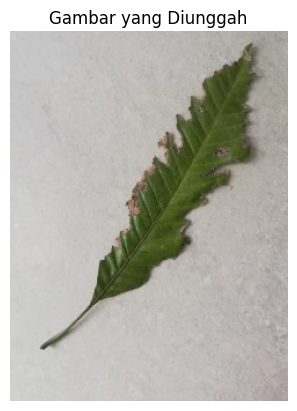

In [ ]:
for fn in uploaded.keys():
    # Tampilkan gambar
    img = Image.open(fn)
    plt.imshow(img)
    plt.axis('off')
    plt.title("Gambar yang Diunggah")
    plt.show()

In [ ]:
# Preprocessing
img = img.resize((150, 150))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

In [ ]:
  # Prediksi
prediction = model.predict(img_array)
class_index = np.argmax(prediction)
class_name = class_labels[class_index]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


In [ ]:
  # Output prediksi dan solusi
print(f"✅ Hasil Prediksi Daun: {class_name}")
print(f"💡 Solusi: {solutions[class_name]}")

✅ Hasil Prediksi Daun: Gall Midge
💡 Solusi: Pangkas daun yang terkena dan gunakan insektisida.
